In [65]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from exploration.import_graph import AcademicGraph
from exploration.graph_features import process_features, SpectralClustering
from exploration.network_models import *

import matplotlib.pyplot as plt

import numpy as np
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
G = AcademicGraph()

domains, graphs, domain_statistics = G.segmented_graphs()

data = {}
features = domain_statistics[0].keys()
for f in features:
    data[f] = [domain_statistics[i][f] for i in range(len(domains))]

df_domain_statistics = pd.DataFrame(data, index=domains)
df_domain_statistics

Preparing domain: Academia
Preparing domain: Applied Sciences
Preparing domain: Education
Preparing domain: Engineering
Preparing domain: Humanities
Preparing domain: Mathematics and Computing
Preparing domain: Medicine and Health
Preparing domain: Natural Sciences
Preparing domain: Social Sciences


,Total,Men,Women,Prop_US
Academia,513855.0,283945.0,155211.0,0.778788
Applied Sciences,52363.0,31169.0,11833.0,0.906957
Education,26682.0,9921.0,13545.0,0.970787
Engineering,53931.0,36295.0,6667.0,0.849680
Humanities,78179.0,41212.0,29596.0,0.903036
Mathematics and Computing,46908.0,30524.0,6700.0,0.849572
Medicine and Health,94688.0,38852.0,40674.0,0.850689
Natural Sciences,123805.0,78600.0,28158.0,0.776311
Social Sciences,72551.0,39663.0,24647.0,0.934278


In [54]:
graph_features = {}
nx_graphs = {}
for domain, g in zip(domains, graphs):
    nx_graphs[domain] = nx.Graph(g)
    graph_features[domain] = process_features(nx_graphs[domain])

In [4]:
data = {}
features = graph_features["Academia"].keys()
for f in features:
    data[f] = [graph_features[domain][f] for domain in domains]

df_graph_features = pd.DataFrame(data, index=domains)
df_graph_features

,num_nodes,num_edges,weighted_num_edges,density,average_degree,weighted_average_degree,clustering_coefficient,weighted_clustering_coefficient,average_shortest_path,diameter,algebraic_connectivity,weighted_algebraic_connectivity
Academia,972,30446,138440.0,0.064517,62.646091,284.855967,0.497233,0.001908,2.508680,5,0.871469,0.871469
Applied Sciences,402,8459,19586.0,0.104949,42.084577,97.442786,0.397702,0.009204,2.425814,5,0.895961,0.895961
Education,378,6037,11590.0,0.084726,31.941799,61.322751,0.333525,0.008984,2.484808,5,0.852364,0.852364
Engineering,332,8110,19649.0,0.147599,48.855422,118.367470,0.469537,0.003976,2.250373,5,0.580916,0.580916
Humanities,430,11309,29759.0,0.122611,52.600000,138.413953,0.444920,0.013528,2.368114,5,0.836122,0.836122
Mathematics and Computing,333,8749,17692.0,0.158273,52.546547,106.258258,0.430017,0.009320,2.167824,5,0.933993,0.933993
Medicine and Health,668,13256,34684.0,0.059503,39.688623,103.844311,0.396005,0.002755,2.536139,5,0.829817,0.829817
Natural Sciences,518,15849,39818.0,0.118362,61.193050,153.737452,0.492320,0.006546,2.287992,5,0.937920,0.937920
Social Sciences,432,12243,28400.0,0.131509,56.680556,131.481481,0.429144,0.010438,2.324139,5,0.859267,0.859267


### Plotting
Interested in:
1. How the different **domains** differ from one another. I'm thinking clustering coefficent, density,
2. **Institutions** within a specific domain: degree distribution, node centrality, node betweeness

In [40]:
def plot_domains(idx: int, feat_name: str) -> None:
    temp = df_graph_features.drop("Academia")
    axs[idx].plot(temp.index, temp[feat_name])
    axs[idx].set_title(feat_name)


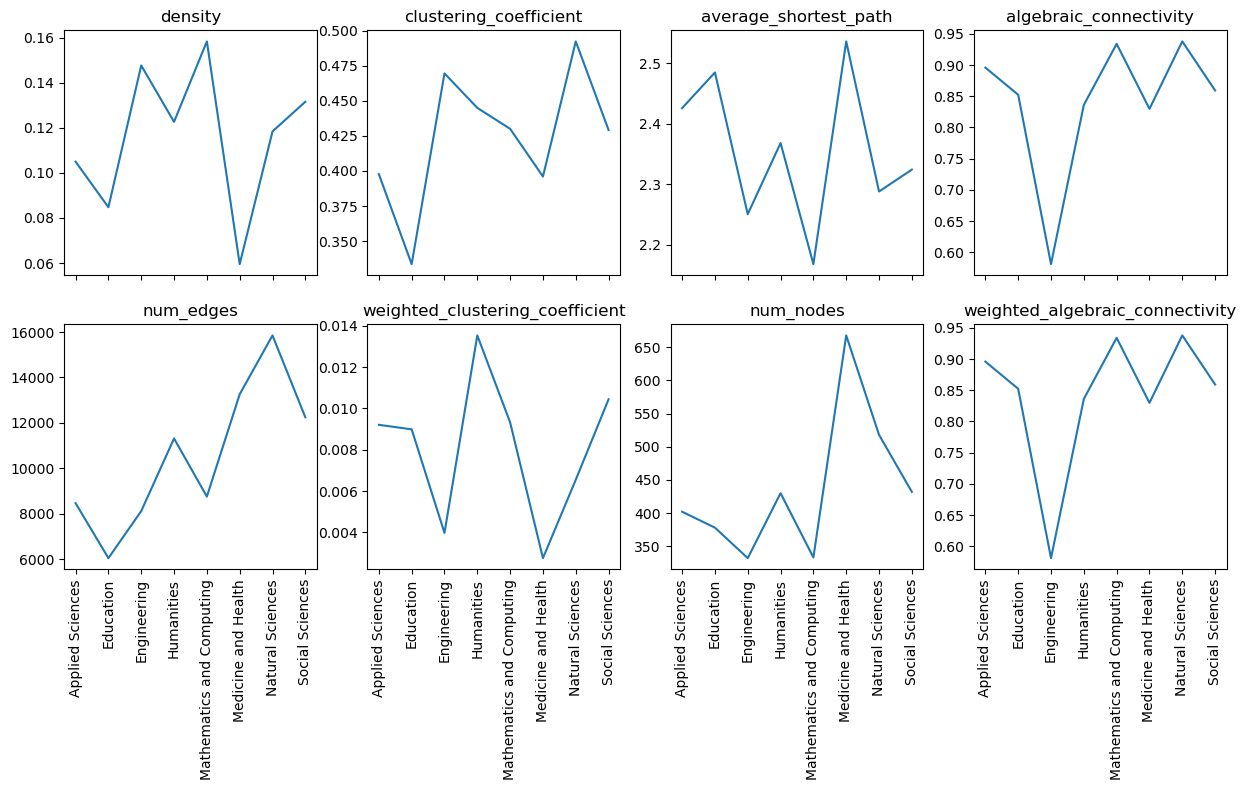

In [45]:
fig, axs = plt.subplots(2,4, figsize = (15,7), sharex = True)
feats = ["density","clustering_coefficient", "average_shortest_path","algebraic_connectivity","num_edges","weighted_clustering_coefficient","num_nodes","weighted_algebraic_connectivity"]

axs = axs.flatten()

for i, feat in enumerate(feats):
    plot_domains(i, feat)
    if i >= 4:
        axs[i].tick_params(axis="x",rotation=90)


##

In [ ]:
def plot_graph(G, pos, node_clusters=None):
  plt.figure(figsize=(5, 5))
  nx.draw(G, pos=pos, node_size=10,
          node_color=[plt.cm.Set1(c) for c in node_clusters]
                      if node_clusters is not None else "gray")
  plt.show()

In [55]:
def plot_individual_domain(G, name):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of G")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    plt.suptitle(name)
    fig.tight_layout()
    plt.show()

In [96]:
academic_graph = nx_graphs["Academia"]

In [101]:
spec_cluster = SpectralClustering(n_classes = 15, normalize="sym")
academic_labels = spec_cluster.fit_predict(academic_graph)

node_list = list(academic_graph.nodes())

node_names_labels = dict(zip(node_list, academic_labels))
cluster_df = G.df.merge(pd.DataFrame.from_dict(dict(node_names_labels), orient="index", columns=["cluster"]).reset_index().rename({"index":"InstitutionId"},axis=1))

U.shape (972, 972)


In [114]:
cluster_df.groupby(["InstitutionName", "cluster"])["weight"].sum().sort_values(ascending=False).reset_index().groupby("cluster").head(6).sort_values(by = "cluster").head(50)

,InstitutionName,cluster,weight
0,Ohio State University,0,19459.0
1,University of Florida,0,18472.0
2,Penn State,0,18049.0
16,North Carolina State,0,13803.0
6,Michigan State,0,16655.0
10,Purdue,0,14920.0
73,Temple,1,8377.0
121,Saint Louis University,1,5604.0
123,Wake Forest,1,5475.0
128,Georgetown,1,5261.0


### Comparison With Network Models






In [5]:
G_academic = nx.Graph(graphs[0])
G_statistics = original_graph_statistics(G_academic)
ER_statistics = ER_graph_statistics(G_academic)
WS_statistics = WS_graph_statistics(G_academic)
BA_statistics = BA_graph_statistics(G_academic)

network_models = ["original", "ER", "WS", "BA"]
statistics = [G_statistics, ER_statistics, WS_statistics, BA_statistics]

data = {}
features = statistics[0].keys()
for f in features:
    data[f] = [statistics[i][f] for i in range(len(network_models))]

df_network_model_statistics = pd.DataFrame(data, index=network_models)
df_network_model_statistics


,num_nodes,num_edges,average_degree,average_shortest_path,clustering_coefficient
original,972,30446.0,62.646091,2.508680,0.497233
ER,972,30446.0,62.646091,1.662684,0.064451
WS,972,30132.0,62.000000,8.337796,0.737705
BA,972,30132.0,62.000000,3.567159,0.048689
